In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from qutip import *
from quantum.non_classicality import wigner_negativity

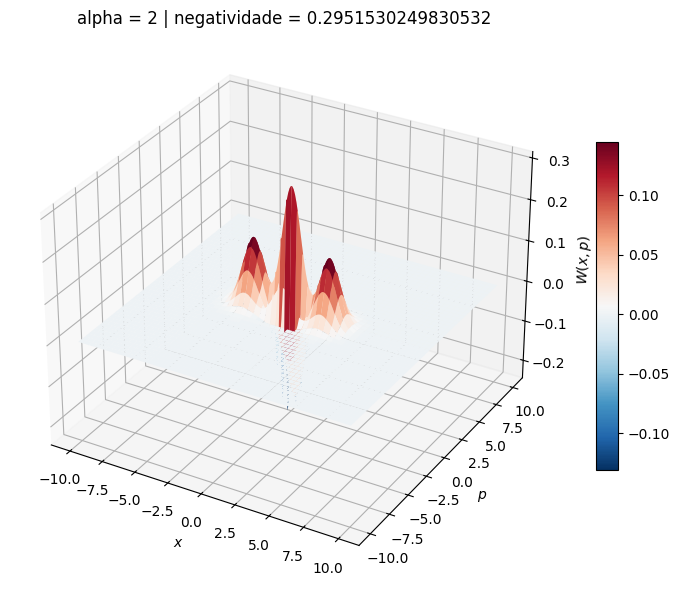

In [16]:


# ----------------------------
# Parâmetros
# ----------------------------
N = 40
alpha =  2

# ----------------------------
# Estado quântico
# ----------------------------
psi = (coherent(N, alpha) + coherent(N, -alpha)).unit()
rho = ket2dm(psi)

# ----------------------------
# Espaço de fase
# ----------------------------
xvec = np.linspace(-10, 10, 200)
X, P = np.meshgrid(xvec, xvec)

# ----------------------------
# Wigner
# ----------------------------
W = wigner(rho, xvec, xvec)


# ----------------------------
# Plot 3D
# ----------------------------
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(
    X, P, W,
    cmap='RdBu_r',
    linewidth=0,
    antialiased=True
)

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$p$')
ax.set_zlabel(r'$W(x,p)$')
ax.set_title(f'alpha = {alpha} | negatividade = {wigner_negativity(rho, xvec, xvec, one_mode=True)}')

fig.colorbar(surf, shrink=0.6, aspect=15)
plt.tight_layout()
plt.show()


In [17]:
# ----------------------------
# Parâmetros
# ----------------------------
N = 40

alpha_vec = np.linspace(0.5, np.sqrt(5), 10)
plot_vec = []
for alpha in alpha_vec:
    print(f'Calculando para alpha = {alpha}')
    psi = (coherent(N, alpha) + coherent(N, -alpha)).unit()
    rho = ket2dm(psi)
    xvec = np.linspace(-10, 10, 250)
    X, P = np.meshgrid(xvec, xvec)
    W = wigner(rho, xvec, xvec)
    plot_vec.append(wigner_negativity(rho, xvec, xvec, one_mode=True))

plt.plot(alpha_vec, plot_vec)
plt.xlabel(r'$\alpha$')
plt.ylabel('Negatividade de Wigner')
plt.title('Negatividade de Wigner vs Parâmetro do Estado Coerente')
plt.grid()
plt.show()

Calculando para alpha = 0.5


KeyboardInterrupt: 